__DISCRETE FOURIER TRANSFORM__<br>x[k] = 1/N (N−1)∑n=0 --> x[n]e^−2πi*kn/N<br><br>__DISCRETE FOURIER INVERSE__<br>xhat[n] = (N−1)∑n=0 --> x[n]e^2πi*nk/N<br>We can recover all of the x[n]'s exactly from xhat[0] , xhat[1], ..., xhat[N-1] using the inverse formula. It stores all the amplitudes of the frequencies.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Discrete Fourier Transform of the vector x[j] for j = 0,1,...,N-1
# This returns j arrays that each store an Nx1 matrix? lol
def mydft(xj):
    N = len(xj)
    n = np.arange(N)
    k = n.reshape((N,1))
    ik = 0
    xvector = []
    for ik in range(N):
        i = 0
        sumx = 0
        #Sigma function
        for i in range(N):
            x = xj[i]*math.e**(-2j*np.pi*k[ik]*i/N)
            sumx = sumx + x
        xn = (1/N)*sumx
        xvector.extend(xn)
    return np.asarray(xvector)

def dfinv(xn):
    N = len(xn)
    n = np.arange(N)
    k = n.reshape((N,1))
    ik = 0
    xvector = []
    for ik in range(N):
        ni = 0
        sumx = 0
        for ni in range(N):
            x = xn[ni]*math.e**(2j*np.pi*k[ni]*n[ik]/N)
            sumx = sumx+x
        xvector.extend(sumx)
    return np.asarray(xvector)

def plotdft(t,x):
    N = len(t)
    n = np.arange(N)
    
    # Plot the function
    plt.plot(t,x)
    plt.title('Function y(t) incremented into N='+str(N))
    plt.grid()
    plt.show()

    #Calculate the Discrete Fourier Transform
    dftx = mydft(x)
    #mydftx = mydft(x)

    # Plot the amplitudes of the frequencies
    plt.stem(n, abs(dftx), 'b', markerfmt=" ",basefmt="-b")
    plt.title('Signal as function of frequency')
    plt.xlabel('Freq(Hz)')
    plt.show()
    
def plotdftinv(x):
    t = len(x)
    xinv = dfinv(x)
    plt.title('Inverse Discrete Fourier Transform')
    plt.plot(range(t),xinv)
    plt.show()

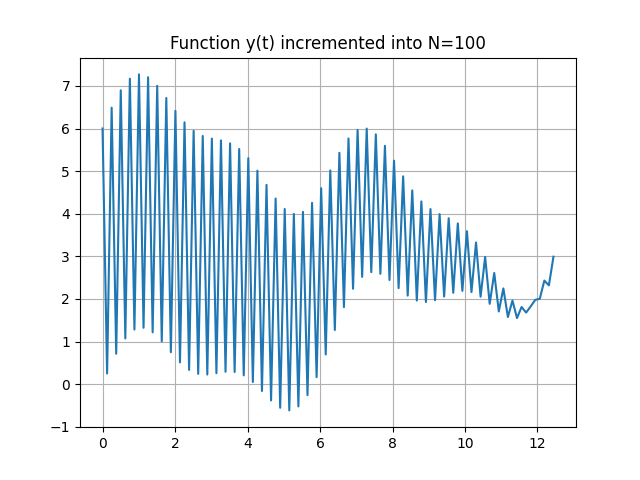

<ipython-input-10-882a03ccf084>:54: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(n, abs(dftx), 'b', markerfmt=" ",basefmt="-b")


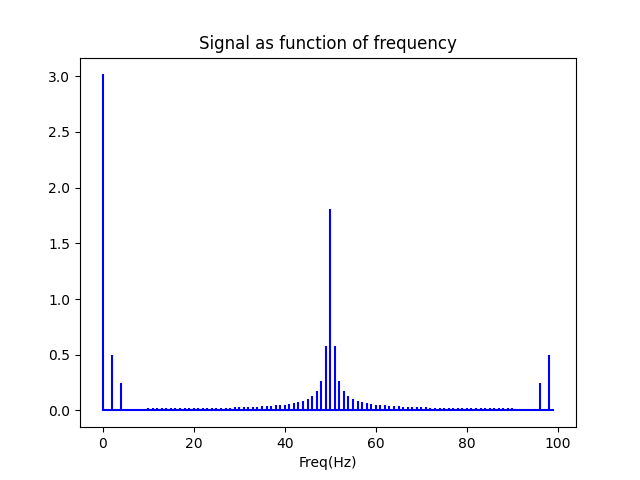

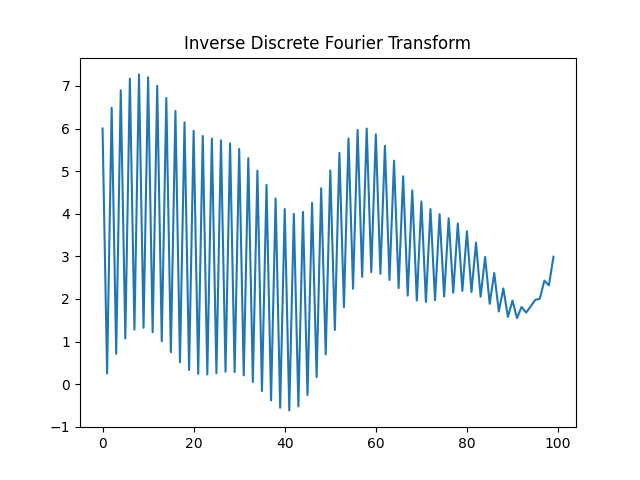

In [12]:
length = 4*np.pi
N = 100
inc = length/N
t = np.arange(0,length,inc)
# w = frequency
w = 1

# Plot the DFT of function x1 = sin(t)
#x1 = np.sin(w*t)
x1 = np.sin(w*t) + 3*np.cos(8*np.pi*w*t) + (.5*np.sin(2*w*t)+3)
dftx = mydft(x1)
plotdft(t,x1)

#Calculate & Plot the Inverse
invdftx = dfinv(dftx)
plotdftinv(dftx)

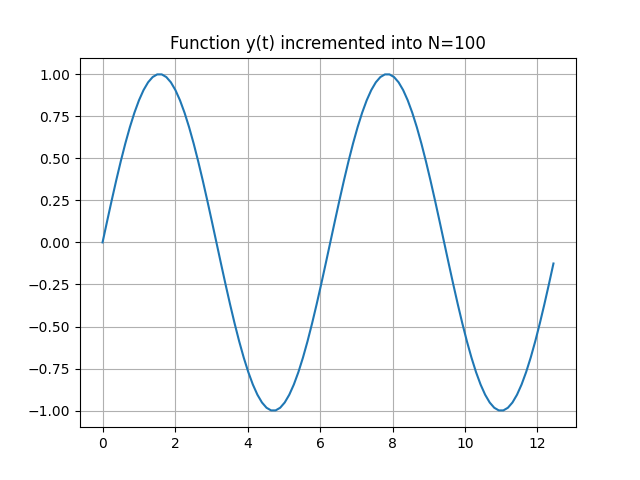

<ipython-input-1-4be8ddef2673>:55: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(n, abs(dftx), 'b', markerfmt=" ",basefmt="-b")


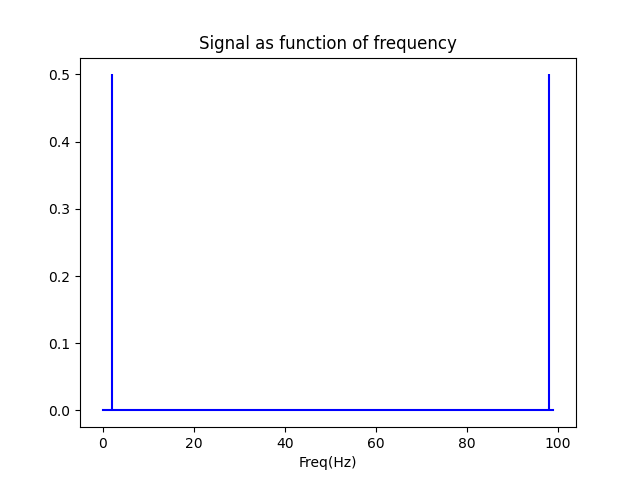

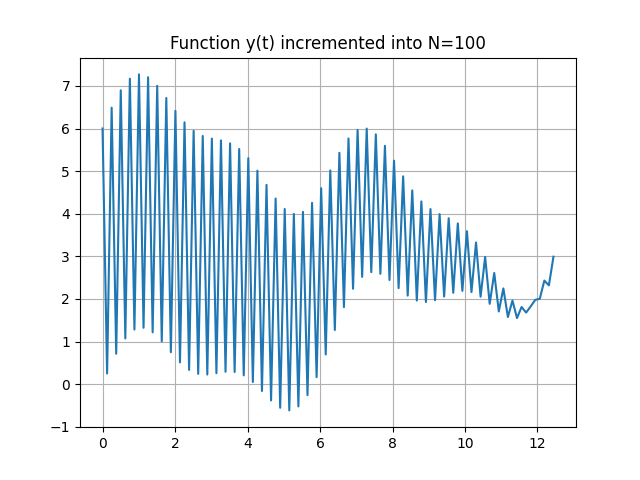

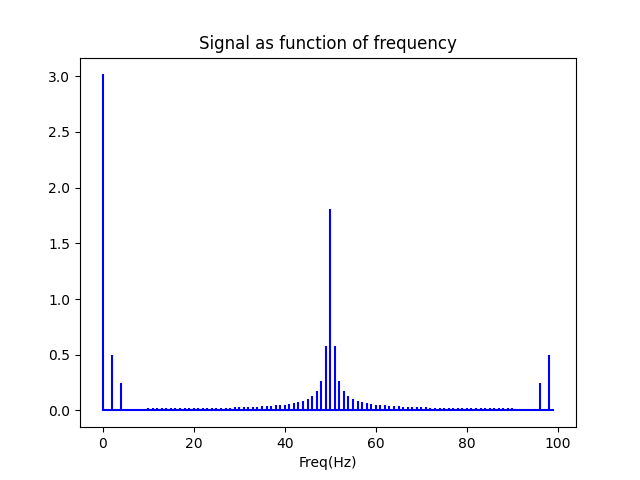

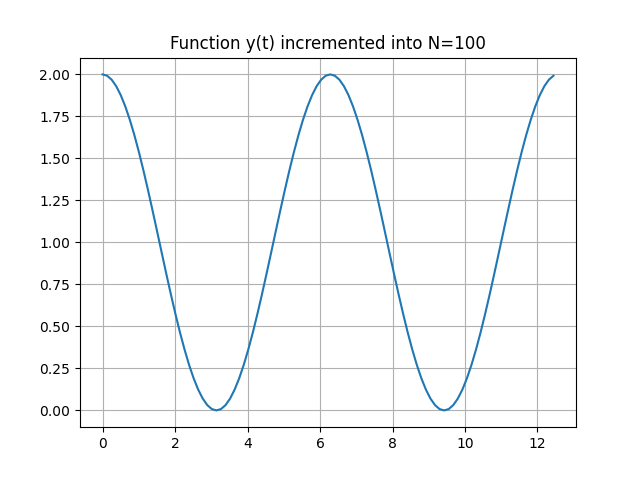

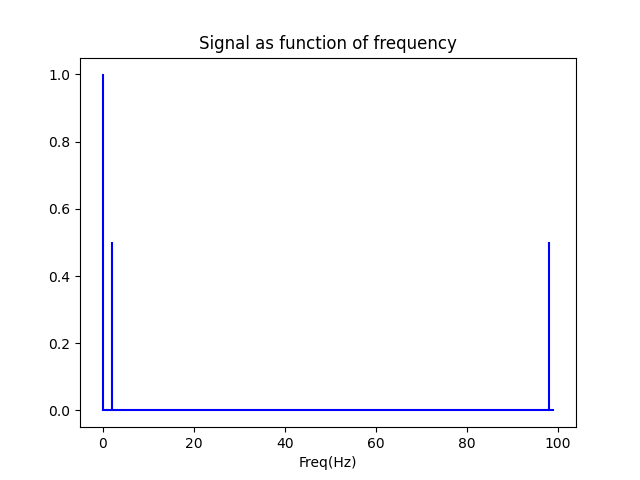

In [3]:
length = 4*np.pi
N = 100
inc = length/N
t = np.arange(0,length,inc)

# Set the functions. Let the variable x = y(t)
xa = np.sin(t)
xb = np.sin(t) + 3*np.cos(8*np.pi*t) + (.5*np.sin(2*t)+3)
xc = np.cos(t) + 1

#PLOT THE FUNCTIONS!
plotdft(t,xa)
plotdft(t,xb)
plotdft(t,xc)